### CSE-221710310031 - SOWMYA

### Assignment 32 (3 JULY 2020)

Problem Statement: Whether youtube comment is spam or ham.

Dataset LInk https://raw.githubusercontent.com/sumathi16/Datasets/master/Youtube05-Shakira.csv

EDA

Create a new data frame with required columns

Check for missing values if there are any remove them

Draw a count plot using seaborn for the column Class.

Check how many records are there for spam and ham. Bag of words and ML

Apply CountVectorizer on the column Content

Convert the count vectorizer output into a dataframe

Apply Naive Bayes and check the metrics

TF IDF and ML

Apply TFIDFfor on column Content

Convert the tf-idf output into a dataframe

Apply Naive Bayes and check the metrics

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/sumathi16/Datasets/master/Youtube05-Shakira.csv")
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28T21:00:08.607000,I love song ﻿,0
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach...",0
4,z133stly3kete3tly22petvwdpmghrlli,Analena López,2015-05-28T17:08:29.827000,shakira is best for worldcup﻿,0


In [3]:
df.CLASS.value_counts()

0    196
1    174
Name: CLASS, dtype: int64

In [4]:
df.drop(["COMMENT_ID","AUTHOR","DATE"],axis=1,inplace=True)
df.head()

,CONTENT,CLASS
0,Nice song﻿,0
1,I love song ﻿,0
2,I love song ﻿,0
3,"860,000,000 lets make it first female to reach...",0
4,shakira is best for worldcup﻿,0


In [5]:
df.isna().sum()

CONTENT    0
CLASS      0
dtype: int64

<function matplotlib.pyplot.legend(*args, **kwargs)>

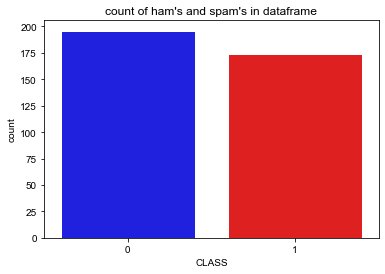

In [6]:
plt.title("count of ham's and spam's in dataframe")
sns.set(style="darkgrid")
sns.countplot(df.CLASS,palette=["blue","red"])
plt.legend

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.CONTENT,df.CLASS,test_size=0.3,random_state=4)

In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(259,)
(259,)
(111,)
(111,)


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
cv

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [10]:
word_cv=cv.fit(x_train)
word_cv.get_feature_names()

['00',
 '000',
 '0687119038',
 '10',
 '100',
 '101721377578919894134',
 '128gb',
 '13',
 '14',
 '15',
 '16gb',
 '17',
 '18',
 '19',
 '1billiom',
 '1hmvtx',
 '1m00s',
 '20',
 '200',
 '2004',
 '200mm',
 '2010',
 '2013',
 '2015',
 '23',
 '25',
 '250',
 '320',
 '32gb',
 '35',
 '360',
 '385',
 '39',
 '390',
 '3d',
 '40',
 '4000',
 '421',
 '4g',
 '4gb',
 '4netjobs',
 '4th',
 '50',
 '500',
 '5000',
 '50k',
 '510',
 '515',
 '55',
 '55mm',
 '5tu9gn1l310',
 '60',
 '600',
 '682',
 '753',
 '7in',
 '860',
 '868',
 '9nl',
 'abominable',
 'abomination',
 'about',
 'absolutely',
 'absorbing',
 'account',
 'acquire',
 'acquiring',
 'act',
 'actually',
 'adam',
 'addition',
 'adele',
 'adf',
 'admirable',
 'adore',
 'adroid',
 'advertise',
 'advertisements',
 'advertisiments',
 'affiliated',
 'afflicted',
 'africa',
 'african',
 'africans',
 'after',
 'again',
 'against',
 'ago',
 'agree',
 'ahead',
 'aid',
 'air',
 'aka',
 'album',
 'all',
 'alot',
 'already',
 'also',
 'alvar',
 'always',
 'am',
 'ama

In [11]:
doc_arr=word_cv.transform(x_train).toarray()
doc_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 3],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
feature_mat=pd.DataFrame(doc_arr,columns=word_cv.get_feature_names())
feature_mat

,00,000,0687119038,10,100,101721377578919894134,128gb,13,14,15,...,year,years,yet,you,your,yourself,youtube,youtubers,zealous,zonepa
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
256,0,1,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,3
257,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,1,0,0,0,0,0


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer()

In [14]:
x_train_trans=tfid.fit_transform(x_train)
x_train_trans

<259x1194 sparse matrix of type '<class 'numpy.float64'>'
	with 3941 stored elements in Compressed Sparse Row format>

In [15]:
x_test_trans=tfid.transform(x_test)
x_test_trans

<111x1194 sparse matrix of type '<class 'numpy.float64'>'
	with 1200 stored elements in Compressed Sparse Row format>

In [16]:
tfid.get_feature_names()

['00',
 '000',
 '0687119038',
 '10',
 '100',
 '101721377578919894134',
 '128gb',
 '13',
 '14',
 '15',
 '16gb',
 '17',
 '18',
 '19',
 '1billiom',
 '1hmvtx',
 '1m00s',
 '20',
 '200',
 '2004',
 '200mm',
 '2010',
 '2013',
 '2015',
 '23',
 '25',
 '250',
 '320',
 '32gb',
 '35',
 '360',
 '385',
 '39',
 '390',
 '3d',
 '40',
 '4000',
 '421',
 '4g',
 '4gb',
 '4netjobs',
 '4th',
 '50',
 '500',
 '5000',
 '50k',
 '510',
 '515',
 '55',
 '55mm',
 '5tu9gn1l310',
 '60',
 '600',
 '682',
 '753',
 '7in',
 '860',
 '868',
 '9nl',
 'abominable',
 'abomination',
 'about',
 'absolutely',
 'absorbing',
 'account',
 'acquire',
 'acquiring',
 'act',
 'actually',
 'adam',
 'addition',
 'adele',
 'adf',
 'admirable',
 'adore',
 'adroid',
 'advertise',
 'advertisements',
 'advertisiments',
 'affiliated',
 'afflicted',
 'africa',
 'african',
 'africans',
 'after',
 'again',
 'against',
 'ago',
 'agree',
 'ahead',
 'aid',
 'air',
 'aka',
 'album',
 'all',
 'alot',
 'already',
 'also',
 'alvar',
 'always',
 'am',
 'ama

In [17]:
tfid.vocabulary_

{'whose': 1139,
 'watching': 1117,
 'this': 1032,
 'in': 534,
 '2015': 23,
 'if': 523,
 'so': 940,
 'hi': 495,
 'you': 1187,
 'guys': 472,
 'should': 917,
 'check': 231,
 'out': 754,
 'extraordinary': 377,
 'website': 1123,
 'called': 205,
 'firepa': 402,
 'com': 251,
 'can': 208,
 'make': 640,
 'money': 684,
 'online': 742,
 'and': 116,
 'start': 970,
 'working': 1165,
 'from': 428,
 'home': 505,
 'today': 1043,
 'as': 138,
 'am': 100,
 'making': 642,
 'over': 755,
 '000': 1,
 'per': 778,
 'month': 685,
 'at': 141,
 'visit': 1095,
 'it': 557,
 'lake': 589,
 'duzafizz': 338,
 'singlewave': 928,
 'spourmo': 966,
 'burder': 198,
 'colorful': 248,
 'claster': 240,
 'incandescent': 535,
 'ambitious': 106,
 'winooze': 1150,
 'absorbing': 63,
 'macabre': 636,
 'crestboot': 286,
 'boxium': 187,
 'womanly': 1157,
 'tan': 1009,
 'ybuwyn': 1181,
 'forgetful': 412,
 'pepelexa': 777,
 'zealous': 1192,
 'best': 169,
 'world': 1167,
 'cup': 287,
 'offical': 732,
 'song': 947,
 'fuck': 429,
 'was': 1

In [18]:
tfid.idf_

array([5.86753445, 4.76892216, 5.86753445, ..., 5.46206934, 5.86753445,
       5.17438727])

In [19]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()

In [20]:
bnb.fit(x_train_trans,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [21]:
y_pred=bnb.predict(x_test_trans)

In [22]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)

array([[67,  0],
       [28, 16]], dtype=int64)

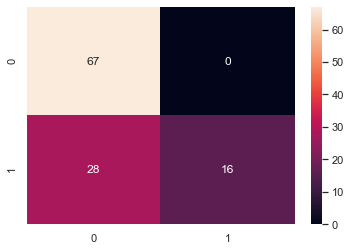

In [23]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        67
           1       1.00      0.36      0.53        44

    accuracy                           0.75       111
   macro avg       0.85      0.68      0.68       111
weighted avg       0.82      0.75      0.71       111



In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7477477477477478